In [323]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt
import numpy as np

lfw_people = fetch_lfw_people(min_faces_per_person=70,  download_if_missing = True, resize=1, color=False)
n_samples, h, w = lfw_people.images.shape

X = lfw_people.data
Y = lfw_people.target

print(n_samples,h,w)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=47)

1288 125 94


In [324]:
#x_train = tf.keras.utils.normalize(x_train, axis=1)
#x_test = tf.keras.utils.normalize(x_test, axis=1)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

x_train = x_train.reshape(x_train.shape[0],h,w,1)

x_train = x_train.astype('float32')
x_train = x_train/255

x_test = x_test.reshape(x_test.shape[0],h,w,1)
x_test = x_test.astype('float32')
x_test = x_test/255

y_train = np.array([[x] for x in y_train])
y_test = np.array([[x] for x in y_test])

#y_train = np.where(y_train == 1, 1, 0)
#y_test = np.where(y_test == 1, 1, 0)
y_train

(862, 11750)
(862,)
(426, 11750)
(426,)


array([[3],
       [4],
       [4],
       [0],
       [1],
       [2],
       [5],
       [3],
       [6],
       [3],
       [5],
       [6],
       [1],
       [3],
       [0],
       [3],
       [0],
       [2],
       [3],
       [1],
       [6],
       [1],
       [4],
       [6],
       [2],
       [6],
       [3],
       [4],
       [0],
       [1],
       [1],
       [3],
       [1],
       [2],
       [1],
       [3],
       [4],
       [2],
       [1],
       [3],
       [1],
       [3],
       [1],
       [6],
       [5],
       [3],
       [3],
       [5],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [0],
       [0],
       [3],
       [4],
       [5],
       [6],
       [4],
       [3],
       [4],
       [4],
       [1],
       [0],
       [3],
       [3],
       [3],
       [6],
       [5],
       [3],
       [6],
       [3],
       [3],
       [1],
       [5],
       [1],
       [4],
       [6],
       [3],
       [1],
       [5],
    

In [322]:
#One-hot encoding
from keras.utils import to_categorical

classes = {
  1: 'target1'
}

num_classes = len(classes)

y_train = to_categorical(y_train,num_classes)
y_test = to_categorical(y_test,num_classes)
y_train

IndexError: index 3 is out of bounds for axis 1 with size 1

In [308]:
from keras import models
from keras import layers


model2 = models.Sequential()

# keras.layers.Conv2D(filters, kernel_size... filter is how many filters (windows of sub pixel set) kernel is the window size eg: 3x3 pixels
model2.add(layers.Conv2D(32, (3,3), activation='relu',input_shape=(125, 94,1)))
model2.add(layers.MaxPool2D((2,2))) # Max Pooling to reduce the spatial dimensions of the output volume. pool_size: integer or tuple of 2 integers, factors by which to downscale (vertical, horizontal)
model2.add(layers.Conv2D(64,(3,3),activation='relu')) # does not need input_shape, since it gets it from previous layer
model2.add(layers.MaxPool2D((2,2)))
model2.add(layers.Conv2D(64,(3,3),activation='relu'))
model2.add(layers.Flatten()) # rewrite tensor to single vector of values
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(10, activation='softmax')) # softmax is good for output layer because Softmax outputs probabilities range. The range will 0 to 1, and the sum of all the probabilities will be equal to one. If the softmax function used for multi-classification model it returns the probabilities of each class and the target class will have the high probability.

model2.summary()

model.compile(loss='categorical_crossentropy', # loss is how to meassure how wrong the model is on its predictions
             optimizer='rmsprop', # "stochastic gradient descent" is a way to tell algorithm how to improve
             metrics=['accuracy'], # what do we care about in our model
             )
model.fit(x_train,
         y_train,
         epochs=8,
         verbose=True,
         batch_size=64,
         validation_split=0.1) # checking periodically how well we are doing

IndexError: index 3 is out of bounds for axis 1 with size 1

In [296]:
model = tf.keras.models.Sequential()

img_input = tf.keras.layers.Input(shape=(125, 94,1))

x = tf.keras.layers.Conv2D(64,3, activation='relu')(img_input)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Conv2D(128, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)

x = tf.keras.layers.Conv2D(256, 3, activation='relu')(x)
x = tf.keras.layers.MaxPooling2D(2)(x)

#x = tf.keras.layers.Conv2D(512, 3, activation='relu')(x) #d
#x = tf.keras.layers.MaxPooling2D(2)(x)

#x = tf.keras.layers.Conv2D(512, 3, activation='relu')(x) #d2
x = tf.keras.layers.Flatten()(x)

x = tf.keras.layers.Dense(4096, activation='relu')(x)
#x = tf.keras.layers.Dense(4096, activation='relu')(x) #d
x = tf.keras.layers.Dense(1000, activation='relu')(x)

x = tf.keras.layers.Dropout(0.5)(x) #0.2

output = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(img_input,output)

model.summary()
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(learning_rate=0.0005),
              metrics=['accuracy'])

model.fit(x_train, steps_per_epoch=5, epochs=80, validation_data=y_train, validation_steps=7, verbose=2)

Model: "model_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_47 (InputLayer)        [(None, 125, 94, 1)]      0         
_________________________________________________________________
conv2d_124 (Conv2D)          (None, 123, 92, 64)       640       
_________________________________________________________________
max_pooling2d_114 (MaxPoolin (None, 61, 46, 64)        0         
_________________________________________________________________
conv2d_125 (Conv2D)          (None, 59, 44, 128)       73856     
_________________________________________________________________
max_pooling2d_115 (MaxPoolin (None, 29, 22, 128)       0         
_________________________________________________________________
conv2d_126 (Conv2D)          (None, 27, 20, 256)       295168    
_________________________________________________________________
max_pooling2d_116 (MaxPoolin (None, 13, 10, 256)       0  

ValueError: The number of samples 862 is not divisible by steps 5. Please change the number of steps to a value that can consume all the samples

In [297]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu)) 
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy']) 


model.fit(x_train, y_train, epochs=8)

Train on 862 samples
Epoch 1/8
862/862 [==============================] - 0s 467us/sample - loss: 2.8989 - accuracy: 0.3039
Epoch 2/8
862/862 [==============================] - 0s 159us/sample - loss: 1.7029 - accuracy: 0.4246
Epoch 3/8
862/862 [==============================] - 0s 155us/sample - loss: 1.5214 - accuracy: 0.4722
Epoch 4/8
862/862 [==============================] - 0s 156us/sample - loss: 1.4735 - accuracy: 0.4675
Epoch 5/8
862/862 [==============================] - 0s 157us/sample - loss: 1.3546 - accuracy: 0.5429
Epoch 6/8
862/862 [==============================] - 0s 154us/sample - loss: 1.2391 - accuracy: 0.5731
Epoch 7/8
862/862 [==============================] - 0s 168us/sample - loss: 1.1428 - accuracy: 0.6009
Epoch 8/8
862/862 [==============================] - 0s 154us/sample - loss: 1.1172 - accuracy: 0.6195


In [298]:
val_loss, val_acc = model.evaluate(x_test, y_test) #Calculate validation loss and validation accuracy
print(val_loss, val_acc) 

426/426 [==============================] - 0s 250us/sample - loss: 1.1816 - accuracy: 0.6667
1.181574351910694 0.6666667


In [299]:
model.save('Convolutional_network.model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


INFO:tensorflow:Assets written to: Convolutional_network.model\assets


INFO:tensorflow:Assets written to: Convolutional_network.model\assets


In [300]:
new_model = tf.keras.models.load_model('Convolutional_network.model')

In [301]:
predictions = new_model.predict(x_test)

In [302]:
import numpy as np

print(np.argmax(predictions[0]))

0


TypeError: Invalid shape (426, 125, 1) for image data

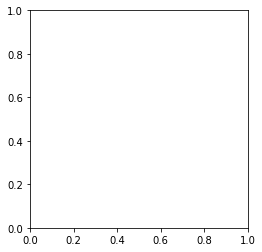

In [325]:
plt.imshow(x_test[0])
plt.show()